**Data Pre-processing**

In [1]:
import pandas as pd
data=pd.read_csv('recipes.csv')
data.head(5)

,Unnamed: 0,recipe_name,prep_time,cook_time,total_time,servings,yield,ingredients,directions,rating,url,cuisine_path,nutrition,timing,img_src
0,0,Apple-Cranberry Crostada,NaN,NaN,NaN,8,6 to 8 - servings,"3 tablespoons butter, 2 pounds Granny Smith ap...",Heat butter in a large skillet over medium-hig...,4.4,https://www.allrecipes.com/recipe/76931/apple-...,/Desserts/Fruit Desserts/Apple Dessert Recipes/,"Total Fat 18g 23%, Saturated Fat 7g 34%, Chole...","Servings: 8, Yield: 6 to 8 - servings",https://www.allrecipes.com/thmb/Tf1wH73bfH6Oql...
1,1,Apple Pie by Grandma Ople,30 mins,1 hrs,1 hrs 30 mins,8,1 9-inch pie,"8 small Granny Smith apples, or as needed, ½ c...","Peel and core apples, then thinly slice. Set a...",4.8,https://www.allrecipes.com/recipe/12682/apple-...,/Desserts/Pies/Apple Pie Recipes/,"Total Fat 19g 24%, Saturated Fat 9g 46%, Chole...","Prep Time: 30 mins, Cook Time: 1 hrs, Total Ti...",https://www.allrecipes.com/thmb/1I95oiTGz6aEpu...
2,2,Sarah's Homemade Applesauce,10 mins,15 mins,25 mins,4,NaN,"4 apples - peeled, cored and chopped, ¾ cup w...","Combine apples, water, sugar, and cinnamon in ...",4.8,https://www.allrecipes.com/recipe/51301/sarahs...,/Side Dish/Applesauce Recipes/,"Total Fat 0g 0%, Sodium 3mg 0%, Total Carbohyd...","Prep Time: 10 mins, Cook Time: 15 mins, Total ...",https://www.allrecipes.com/thmb/VY5d0tZHB8xz6y...
3,3,Apple Crisp,30 mins,45 mins,1 hrs 15 mins,12,1 9x13-inch pan,"10 cups all-purpose apples, peeled, cored and ...",Preheat the oven to 350 degrees F (175 degrees...,4.7,https://www.allrecipes.com/recipe/12409/apple-...,/Desserts/Crisps and Crumbles Recipes/Apple Cr...,"Total Fat 8g 11%, Saturated Fat 5g 25%, Choles...","Prep Time: 30 mins, Cook Time: 45 mins, Total ...",https://www.allrecipes.com/thmb/uAzhPOh86PfR-N...
4,4,Apple Pie Filling,20 mins,20 mins,2 hrs 40 mins,40,5 9-inch pies,"18 cups thinly sliced apples, 3 tablespoons le...",Toss apples with lemon juice in a large bowl a...,4.7,https://www.allrecipes.com/recipe/12681/apple-...,/Desserts/Pies/Apple Pie Recipes/,"Total Fat 0g 0%, Sodium 61mg 3%, Total Carbohy...","Prep Time: 20 mins, Cook Time: 20 mins, Additi...",https://www.allrecipes.com/thmb/c0bbYaS1V_mTt_...


In [2]:
data.describe()

,Unnamed: 0,servings,rating
count,1090.000000,1090.000000,1090.000000
mean,544.500000,13.755046,4.533853
std,314.800201,19.886076,0.349814
min,0.000000,1.000000,2.000000
25%,272.250000,6.000000,4.400000
50%,544.500000,8.000000,4.600000
75%,816.750000,12.000000,4.700000
max,1089.000000,240.000000,5.000000


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1090 entries, 0 to 1089
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1090 non-null   int64  
 1   recipe_name   1090 non-null   object 
 2   prep_time     1039 non-null   object 
 3   cook_time     782 non-null    object 
 4   total_time    1045 non-null   object 
 5   servings      1090 non-null   int64  
 6   yield         879 non-null    object 
 7   ingredients   1090 non-null   object 
 8   directions    1090 non-null   object 
 9   rating        1090 non-null   float64
 10  url           1090 non-null   object 
 11  cuisine_path  1090 non-null   object 
 12  nutrition     1090 non-null   object 
 13  timing        1090 non-null   object 
 14  img_src       1090 non-null   object 
dtypes: float64(1), int64(2), object(12)
memory usage: 127.9+ KB


In [4]:
data=data.drop(columns=['Unnamed: 0'])
data.isnull().sum()

,0
recipe_name,0
prep_time,51
cook_time,308
total_time,45
servings,0
yield,211
ingredients,0
directions,0
rating,0
url,0


In [5]:
import re
def time_to_minutes(time_str):
    if pd.isnull(time_str):
        return None
    time_str = time_str.lower()
    hours = re.search(r'(\d+)\s*hrs?', time_str)
    minutes = re.search(r'(\d+)\s*mins?', time_str)
    total_minutes = 0
    if hours:
        total_minutes += int(hours.group(1)) * 60
    if minutes:
        total_minutes += int(minutes.group(1))
    return total_minutes if total_minutes > 0 else None

data['prep_time'] = data['prep_time'].apply(time_to_minutes)
data['cook_time'] = data['cook_time'].apply(time_to_minutes)
data['total_time'] = data['total_time'].apply(time_to_minutes)

missing_values_after_conversion = data.isnull().sum()
data[['prep_time', 'cook_time', 'total_time']].head(), missing_values_after_conversion


(   prep_time  cook_time  total_time
 0        NaN        NaN         NaN
 1       30.0       60.0        90.0
 2       10.0       15.0        25.0
 3       30.0       45.0        75.0
 4       20.0       20.0       160.0,
 recipe_name       0
 prep_time        51
 cook_time       308
 total_time       45
 servings          0
 yield           211
 ingredients       0
 directions        0
 rating            0
 url               0
 cuisine_path      0
 nutrition         0
 timing            0
 img_src           0
 dtype: int64)

In [6]:

data['total_time'].fillna(data['prep_time'] + data['cook_time'], inplace=True)

data['cook_time'].fillna(data['total_time'] - data['prep_time'], inplace=True)

data['prep_time'].fillna(data['total_time'] - data['cook_time'], inplace=True)


<ipython-input-6-59e7d1e61340>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['total_time'].fillna(data['prep_time'] + data['cook_time'], inplace=True)
<ipython-input-6-59e7d1e61340>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(val

In [7]:
data.isnull().sum()

,0
recipe_name,0
prep_time,45
cook_time,45
total_time,45
servings,0
yield,211
ingredients,0
directions,0
rating,0
url,0


In [8]:
import re
import numpy as np

# Function to clean and standardize the 'yield' column
def extract_servings(yield_str):
    if pd.isnull(yield_str):
        return np.nan
    yield_str = str(yield_str)  # Convert to string
    # Find numbers in the yield string
    servings = re.findall(r'\d+', yield_str)
    if len(servings) == 1:
        return int(servings[0])
    elif len(servings) > 1:
        # Calculate average if it's a range (e.g., "6 to 8 servings")
        return (int(servings[0]) + int(servings[1])) // 2
    else:
        return np.nan  # Set to NaN if no numbers found

# Apply the function to the yield column
data['yield'] = data['yield'].apply(extract_servings)

# Fill any remaining NaN values in 'yield' with the median servings value
data['yield'].fillna(data['yield'].median(), inplace=True)

# Check the cleaned data
data['yield'].head()


<ipython-input-8-bb9a74fef978>:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['yield'].fillna(data['yield'].median(), inplace=True)


,yield
0,7.0
1,5.0
2,5.0
3,5.0
4,7.0


In [9]:
data.isnull().sum()

,0
recipe_name,0
prep_time,45
cook_time,45
total_time,45
servings,0
yield,0
ingredients,0
directions,0
rating,0
url,0


In [10]:
data['prep_time'].fillna(data['prep_time'].mean(), inplace=True)
data['cook_time'].fillna(data['cook_time'].mean(), inplace=True)
data['total_time'].fillna(data['total_time'].mean(), inplace=True)

data[['prep_time', 'cook_time', 'total_time']].isnull().sum()

<ipython-input-10-11415524a4fe>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['prep_time'].fillna(data['prep_time'].mean(), inplace=True)
<ipython-input-10-11415524a4fe>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=

,0
prep_time,0
cook_time,0
total_time,0


In [11]:
data.head(5)

,recipe_name,prep_time,cook_time,total_time,servings,yield,ingredients,directions,rating,url,cuisine_path,nutrition,timing,img_src
0,Apple-Cranberry Crostada,18.952153,45.132057,93.533014,8,7.0,"3 tablespoons butter, 2 pounds Granny Smith ap...",Heat butter in a large skillet over medium-hig...,4.4,https://www.allrecipes.com/recipe/76931/apple-...,/Desserts/Fruit Desserts/Apple Dessert Recipes/,"Total Fat 18g 23%, Saturated Fat 7g 34%, Chole...","Servings: 8, Yield: 6 to 8 - servings",https://www.allrecipes.com/thmb/Tf1wH73bfH6Oql...
1,Apple Pie by Grandma Ople,30.000000,60.000000,90.000000,8,5.0,"8 small Granny Smith apples, or as needed, ½ c...","Peel and core apples, then thinly slice. Set a...",4.8,https://www.allrecipes.com/recipe/12682/apple-...,/Desserts/Pies/Apple Pie Recipes/,"Total Fat 19g 24%, Saturated Fat 9g 46%, Chole...","Prep Time: 30 mins, Cook Time: 1 hrs, Total Ti...",https://www.allrecipes.com/thmb/1I95oiTGz6aEpu...
2,Sarah's Homemade Applesauce,10.000000,15.000000,25.000000,4,5.0,"4 apples - peeled, cored and chopped, ¾ cup w...","Combine apples, water, sugar, and cinnamon in ...",4.8,https://www.allrecipes.com/recipe/51301/sarahs...,/Side Dish/Applesauce Recipes/,"Total Fat 0g 0%, Sodium 3mg 0%, Total Carbohyd...","Prep Time: 10 mins, Cook Time: 15 mins, Total ...",https://www.allrecipes.com/thmb/VY5d0tZHB8xz6y...
3,Apple Crisp,30.000000,45.000000,75.000000,12,5.0,"10 cups all-purpose apples, peeled, cored and ...",Preheat the oven to 350 degrees F (175 degrees...,4.7,https://www.allrecipes.com/recipe/12409/apple-...,/Desserts/Crisps and Crumbles Recipes/Apple Cr...,"Total Fat 8g 11%, Saturated Fat 5g 25%, Choles...","Prep Time: 30 mins, Cook Time: 45 mins, Total ...",https://www.allrecipes.com/thmb/uAzhPOh86PfR-N...
4,Apple Pie Filling,20.000000,20.000000,160.000000,40,7.0,"18 cups thinly sliced apples, 3 tablespoons le...",Toss apples with lemon juice in a large bowl a...,4.7,https://www.allrecipes.com/recipe/12681/apple-...,/Desserts/Pies/Apple Pie Recipes/,"Total Fat 0g 0%, Sodium 61mg 3%, Total Carbohy...","Prep Time: 20 mins, Cook Time: 20 mins, Additi...",https://www.allrecipes.com/thmb/c0bbYaS1V_mTt_...


In [12]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
if 'cuisine_path' in data.columns:
    data['cuisine_path'] = label_encoder.fit_transform(data['cuisine_path'])

scaler = StandardScaler()
numerical_cols = ['prep_time', 'cook_time', 'total_time', 'yield']
data[numerical_cols] = scaler.fit_transform(data[numerical_cols])


In [13]:
x = data.drop(columns=['rating'])
y = data['rating']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

**Data Visualization / EDA using Python Lib**

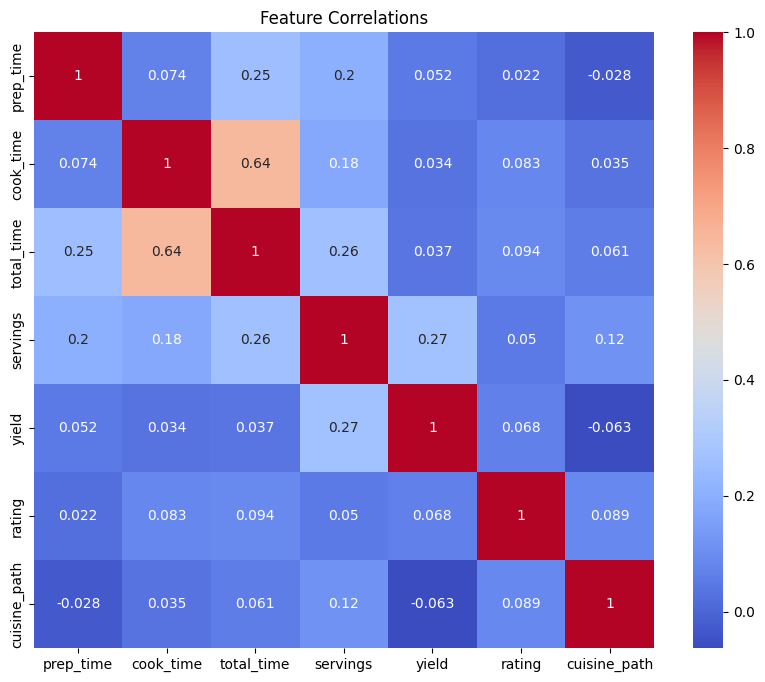

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
# Selecting only numerical columns for correlation
numeric_data = data.select_dtypes(include=['float64', 'int64'])

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlations")
plt.show()


**Model Creation and Testing (More than one models)**

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split

X = data[['prep_time', 'cook_time', 'total_time', 'yield']]
y = data['rating']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

linear_regression = LinearRegression()

linear_regression.fit(X_train, y_train)

y_pred_lr = linear_regression.predict(X_test)

mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression Mean Squared Error: ",mse_lr)
print(f"Linear Regression R² Score: {r2_lr}")


Linear Regression Mean Squared Error:  0.11959288960764806
Linear Regression R² Score: -0.006603052594884362


In [18]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = data[['prep_time', 'cook_time', 'total_time', 'yield']]
y = data['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

knn = KNeighborsRegressor(n_neighbors=5)

knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)

mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)

print(f"KNN Regression Mean Squared Error: {mse_knn}")
print(f"KNN Regression R² Score: {r2_knn}")

KNN Regression Mean Squared Error: 0.12922935779816513
KNN Regression R² Score: -0.08771237547044475


In [19]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

data['total_time_per_serving'] = data['total_time'] / data['servings']
data['ingredient_count'] = data['ingredients'].apply(lambda x: len(x.split(',')))
data['prep_cook_interaction'] = data['prep_time'] * data['cook_time']

X = data[['prep_time', 'cook_time', 'total_time', 'servings',
           'yield', 'total_time_per_serving', 'ingredient_count',
           'prep_cook_interaction']]
y = data['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_regressor = RandomForestRegressor(random_state=42)

cv_scores = cross_val_score(rf_regressor, X_train, y_train, cv=5, scoring='r2')

rf_regressor.fit(X_train, y_train)

y_pred_rf = rf_regressor.predict(X_test)

mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"Cross-Validation R² Scores: {cv_scores}")
print(f"Mean Cross-Validation R²: {cv_scores.mean()}")
print(f"Random Forest Mean Squared Error: {mse_rf}")
print(f"Random Forest R² Score: {r2_rf}")

Cross-Validation R² Scores: [-0.00552361 -0.06761127 -0.06604885 -0.10739193 -0.15932271]
Mean Cross-Validation R²: -0.08117967463126688
Random Forest Mean Squared Error: 0.1021665828598731
Random Forest R² Score: 0.1400726705631864


In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

data['total_time_per_serving'] = data['total_time'] / data['servings']
data['ingredient_count'] = data['ingredients'].apply(lambda x: len(x.split(',')))
data['prep_cook_interaction'] = data['prep_time'] * data['cook_time']

X = data[['prep_time', 'cook_time', 'total_time', 'servings',
           'yield', 'total_time_per_serving', 'ingredient_count',
           'prep_cook_interaction']]
y = data['rating']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

dt_regressor = DecisionTreeRegressor(random_state=42)

param_grid = {
    'max_depth': [None, 5, 10, 15, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(estimator=dt_regressor,
                           param_grid=param_grid,
                           cv=5,
                           scoring='r2',
                           verbose=1,
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
best_model = grid_search.best_estimator_

y_pred_dt = best_model.predict(X_test)
mse_dt = mean_squared_error(y_test, y_pred_dt)
r2_dt = r2_score(y_test, y_pred_dt)
print(f"Best Decision Tree Parameters: {best_params}")
print(f"Decision Tree Mean Squared Error: {mse_dt}")
print(f"Decision Tree R² Score: {r2_dt}")

Fitting 5 folds for each of 45 candidates, totalling 225 fits
Best Decision Tree Parameters: {'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 10}
Decision Tree Mean Squared Error: 0.12267199652288999
Decision Tree R² Score: -0.03251963033054217
